# Checkpoint 1 Code

Gloria Kao, Shentong Li

## 1. EDA

In [26]:
import numpy as np 
import pandas as pd
import geopandas as gpd
import folium
import seaborn as sns
from shapely.geometry import Point
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

In [2]:
gis_2024_1004 = pd.read_csv('data/gis_weatherstation_shape_2024_10_04.csv')
station_summary_2023_08_02 = pd.read_csv('data/src_wings_meteorology_station_summary_snapshot_2023_08_02.csv')
windspeed_2023_08_02 = pd.read_csv('data/src_wings_meteorology_windspeed_snapshot_2023_08_02.csv')

### 1.1 Table 1 - GIS 2024_10_04
#### 1.1.1 Basic Summary Stats

In [3]:
gis_2024_1004

,objectid,weatherstationcode,weatherstationname,scadartuid,structureid,nwszone,district,thomasbrospagegrid,constructionstatus,creationuser,...,elevation,twinguid,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date
0,1,CBD,Carlsbad,5158.0,P124785,Coastal-243,6.0,1126-G1,A,seu_gis_elec,...,72,NaN,1,N,N,NaN,{ED5DE7F2-F63A-41EA-BA80-9F71495334A3},POINT (1540299.9388 12029375.0425),4431,10/4/2024
1,2,CCR,Cuca Ranch,1915.0,Z118027,Mountain-258,3.0,1052-A5,A,seu_gis_elec,...,2513,NaN,3,N,Y,NaN,{82759049-437B-4A5C-8796-10C8D7098C5B},POINT (1667010.27856 12088881.1767),4431,10/4/2024
2,3,CES,Country Estates,1995.0,Z416611,Inland Valley-250,3.0,1153-G7,A,seu_gis_elec,...,1822,NaN,3,N,Y,NaN,{6A3A6DAD-6CD1-43B7-A0FE-72A52A46A4F7},POINT (1703876.2967 11989778.75946),4431,10/4/2024
3,208,ROV,Rim of the Valley,4818.0,Z416170,Inland Valley-250,3.0,1071-B1,A,gwharris,...,1533,NaN,3,N,Y,NaN,{AD1AEA81-BC74-4954-8D25-421C79F40D88},POINT (1646528.56915 12083236.45575),4431,10/4/2024
4,5,CHO,Chollas Lake,5182.0,P970712,Inland Valley-250,1.0,1270-C7,A,seu_gis_elec,...,448,NaN,1,N,N,NaN,{1294A90A-9558-458E-8EA5-9D15B2A16D8D},POINT (1619955.10724 11883209.4286),4431,10/4/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,146,HAU,Hauser Mountain,4828.0,Z972858,Mountain-258,4.0,1316-J1,A,calonzo,...,3189,NaN,3,N,Y,NaN,{EFF383D5-266E-4B6D-A25B-C71D3B52247B},POINT (1776616.0495 11855234.4288),4431,10/4/2024
219,223,BOB,Bob Owens Canyon,4841.0,Z571472,Inland Valley-250,4.0,1295-A7,A,CLCosby,...,2671,NaN,3,N,Y,NaN,{9D545CF5-97C2-4EA1-A794-DEDCFD1D4437},POINT (1732301.64404 11860546.56055),4431,10/4/2024
220,224,MWG,MT. WOODSON GOLF CLUB,4827.0,P518334,INLAND VALLEY-250,3.0,1171-D3,A,KSTETS,...,1717,NaN,3,N,Y,NaN,{BCF2F0F6-C481-43A2-B237-DD05D83E0D13},POINT (1648988.038 11985389.44244),4431,10/4/2024
221,4,CGD,Cole Grade,1957.0,Z416193,Inland Valley-250,3.0,1070-G1,A,seu_gis_elec,...,1691,NaN,2,N,Y,NaN,{D0BC3059-6829-459B-AD6E-3446161600EF},POINT (1635642.92426 12082797.67706),4431,10/4/2024


In [4]:
gis_2024_1004.columns

Index(['objectid', 'weatherstationcode', 'weatherstationname', 'scadartuid',
       'structureid', 'nwszone', 'district', 'thomasbrospagegrid',
       'constructionstatus', 'creationuser', 'datecreated', 'datemodified',
       'lastuser', 'structureguid', 'symbolrotation', 'latitude', 'longitude',
       'elevation', 'twinguid', 'hftd', 'zone1idc', 'hftdidc',
       'gdb_geomattr_data', 'globalid', 'shape', 'shape_srid',
       'snapshot_date'],
      dtype='object')

In [5]:
station_location = gis_2024_1004[['weatherstationcode', 'latitude', 'longitude']]
station_location

,weatherstationcode,latitude,longitude
0,CBD,33.137352,-117.327141
1,CCR,33.301305,-116.912993
2,CES,33.028760,-116.792850
3,ROV,33.285820,-116.980023
4,CHO,32.736035,-117.066590
...,...,...,...
218,HAU,32.658194,-116.557345
219,BOB,32.673289,-116.701321
220,MWG,33.016832,-116.972033
221,CGD,33.284635,-117.015530


In [6]:
gis_2024_1004.describe()

,objectid,scadartuid,district,symbolrotation,latitude,longitude,elevation,twinguid,hftd,gdb_geomattr_data,shape_srid
count,223.000000,222.000000,220.000000,223.0,223.000000,223.000000,223.000000,0.0,223.000000,0.0,223.0
mean,113.632287,4118.216216,3.468182,0.0,33.024966,-116.876526,1917.538117,NaN,2.408072,NaN,4431.0
std,65.668353,2740.278065,1.004050,0.0,0.250858,0.280917,1324.409192,NaN,0.684005,NaN,0.0
min,1.000000,1900.000000,1.000000,0.0,32.541970,-117.753500,12.000000,NaN,1.000000,NaN,4431.0
25%,57.500000,1966.250000,3.000000,0.0,32.830921,-117.072524,777.000000,NaN,2.000000,NaN,4431.0
50%,113.000000,4822.500000,3.000000,0.0,33.036349,-116.895280,1608.000000,NaN,3.000000,NaN,4431.0
75%,169.500000,5144.000000,4.000000,0.0,33.230939,-116.675728,2839.000000,NaN,3.000000,NaN,4431.0
max,261.000000,19200.000000,7.000000,0.0,33.569545,-116.037800,5795.000000,NaN,3.000000,NaN,4431.0


In [7]:
# check null
gis_2024_1004.isnull().sum()

objectid                0
weatherstationcode      0
weatherstationname      0
scadartuid              1
structureid             5
nwszone                 0
district                3
thomasbrospagegrid      2
constructionstatus      0
creationuser            0
datecreated             0
datemodified            4
lastuser                4
structureguid           6
symbolrotation          0
latitude                0
longitude               0
elevation               0
twinguid              223
hftd                    0
zone1idc                0
hftdidc                 0
gdb_geomattr_data     223
globalid                0
shape                   0
shape_srid              0
snapshot_date           0
dtype: int64

In [8]:
# num of stations contained
gis_2024_1004['weatherstationname'].nunique()

222

In [9]:
duplicate_stations = gis_2024_1004[gis_2024_1004.duplicated(subset=['weatherstationname'], keep=False)]
duplicate_stations

,objectid,weatherstationcode,weatherstationname,scadartuid,structureid,nwszone,district,thomasbrospagegrid,constructionstatus,creationuser,...,elevation,twinguid,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date
159,161,LAG,Laguna,1968.0,P40066,Mountain-258,4.0,1237-J3,R,seu_gis_elec,...,5024,NaN,3,N,Y,NaN,{ACC7851A-8A44-445E-946C-F70D5E20B7E6},POINT (1802464.58704 11923398.8896),4431,10/4/2024
187,191,LAG,Laguna,1968.0,P258651,Mountain-258,4.0,1237-J3,P,cray,...,5024,NaN,3,N,Y,NaN,{02A77C09-9D50-4E03-85F8-E0E5A63D7A26},POINT (1802693.0082 11923201.08057),4431,10/4/2024


In [10]:
gis_2024_1004['nwszone'].value_counts()

nwszone
Inland Valley-250     114
Mountain-258           54
Coastal-243            18
INLAND VALLEY-250      17
Coastal-554             4
COASTAL-243             4
MOUNTAIN-258            4
Desert-262              3
Desert-232              2
Coastal-552             1
Inland Valleys-250      1
Mountain-257            1
Name: count, dtype: int64

#### 1.1.2 Geospatial Analysis
Show the details of each station by clicking on the icon in the map.

In [11]:
map_center = [gis_2024_1004['latitude'].mean(), gis_2024_1004['longitude'].mean()]
m1 = folium.Map(location=map_center, zoom_start=10)

# Add weather station points to the map
for _, row in gis_2024_1004.iterrows():
    # Create a popup with relevant information
    popup_text = f"""
    Weather Station: {row['weatherstationname']}<br>
    Elevation: {row['elevation']} m<br>
    NWS Zone: {row['nwszone']}<br>
    Structure ID: {row['structureid']}<br>
    """
    
    # Add a marker for each weather station
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m1)


boundary_coords = [
    (gis_2024_1004['latitude'].min(), gis_2024_1004['longitude'].min()),
    (gis_2024_1004['latitude'].min(), gis_2024_1004['longitude'].max()),
    (gis_2024_1004['latitude'].max(), gis_2024_1004['longitude'].max()),
    (gis_2024_1004['latitude'].max(), gis_2024_1004['longitude'].min())
]

# boundary box
# folium.Polygon(locations=boundary_coords, color='green', fill=True, fill_opacity=0.2).add_to(m)

m1.save('weather_stations_with_area_map.html')
m1

### 1.2 Table 2 - Station Summary 2023_08_02
#### 1.2.1 Basic Summary Statistics

In [12]:
station_summary_2023_08_02

,station,vri,alert,max_gust,99th,95th,snapshot_date
0,AMO,H,35,40,32,24,2023-08-02
1,ANE,M,35,43,32,25,2023-08-02
2,ARH,L,40,46,40,31,2023-08-02
3,AVO,H,35,43,29,24,2023-08-02
4,AVY,L,45,62,53,40,2023-08-02
...,...,...,...,...,...,...,...
211,WST,M,45,51,45,39,2023-08-02
212,WSY,L,45,75,55,43,2023-08-02
213,WWY,M,45,59,46,37,2023-08-02
214,WYN,M,45,54,46,41,2023-08-02


In [13]:
station_summary_2023_08_02.describe()

,alert,max_gust,99th,95th
count,216.000000,216.000000,216.000000,216.000000
mean,39.143519,50.287037,39.972222,31.495370
std,4.476580,13.020950,9.914010,7.902309
min,35.000000,16.000000,16.000000,13.000000
25%,35.000000,41.000000,32.750000,25.000000
50%,37.000000,49.000000,40.000000,31.000000
75%,45.000000,58.250000,46.000000,37.000000
max,48.000000,105.000000,81.000000,62.000000


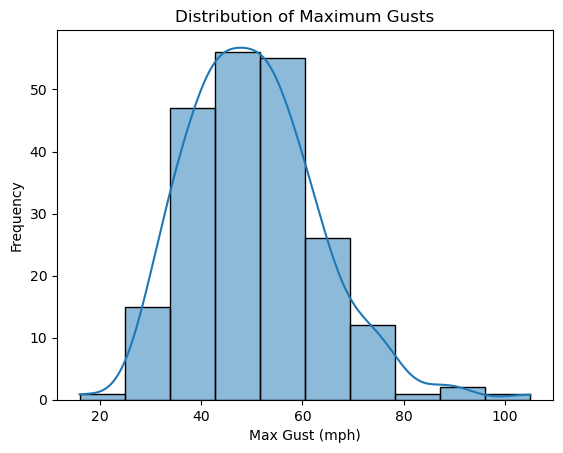

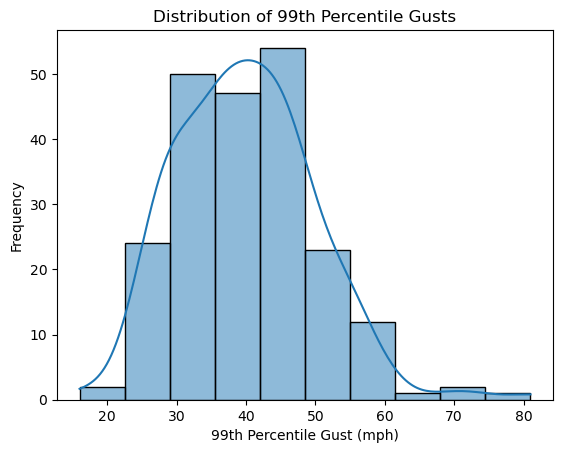

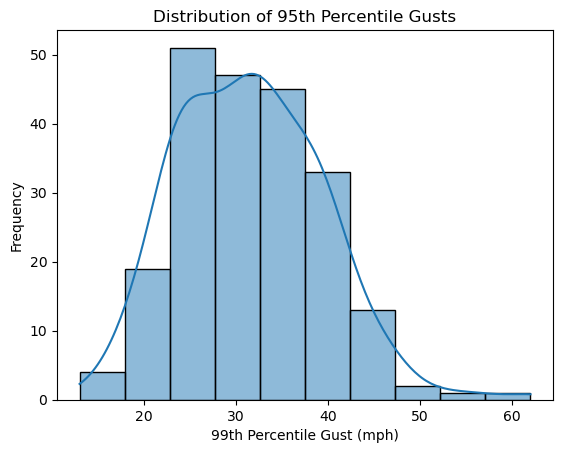

In [14]:
# distribution graphs 
sns.histplot(station_summary_2023_08_02['max_gust'], bins=10, kde=True)
plt.title('Distribution of Maximum Gusts')
plt.xlabel('Max Gust (mph)')
plt.ylabel('Frequency')
plt.show()


sns.histplot(station_summary_2023_08_02['99th'], bins=10, kde=True)
plt.title('Distribution of 99th Percentile Gusts')
plt.xlabel('99th Percentile Gust (mph)')
plt.ylabel('Frequency')
plt.show()


sns.histplot(station_summary_2023_08_02['95th'], bins=10, kde=True)
plt.title('Distribution of 95th Percentile Gusts')
plt.xlabel('99th Percentile Gust (mph)')
plt.ylabel('Frequency')
plt.show()

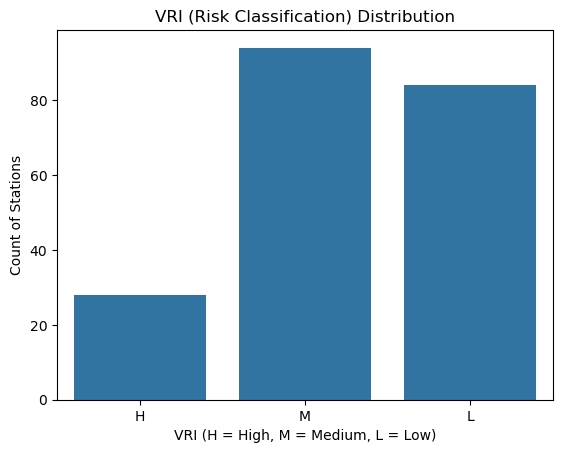

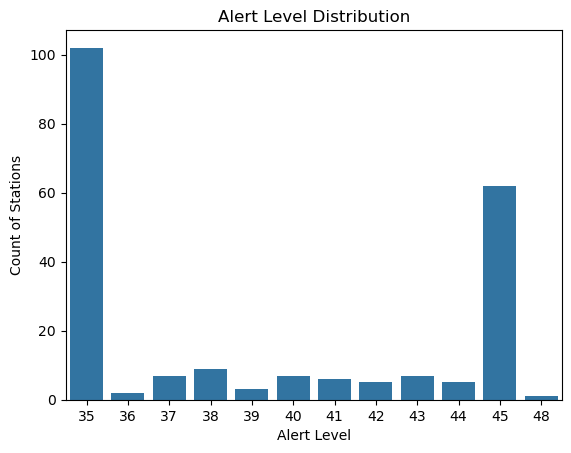

In [15]:
sns.countplot(x='vri', data=station_summary_2023_08_02)
plt.title('VRI (Risk Classification) Distribution')
plt.xlabel('VRI (H = High, M = Medium, L = Low)')
plt.ylabel('Count of Stations')
plt.show()

# Bar plot for Alert Levels
sns.countplot(x='alert', data=station_summary_2023_08_02)
plt.title('Alert Level Distribution')
plt.xlabel('Alert Level')
plt.ylabel('Count of Stations')
plt.show()

### 1.2.2 Merging datasets

In [ ]:
# merging the two datasets about weather stations together
merged_df = pd.merge(station_summary_2023_08_02, gis_2024_1004, right_on= 'weatherstationcode', left_on='station', how='left')
merged_df

,station,vri,alert,max_gust,99th,95th,snapshot_date_x,objectid,weatherstationcode,weatherstationname,...,elevation,twinguid,hftd,zone1idc,hftdidc,gdb_geomattr_data,globalid,shape,shape_srid,snapshot_date_y
0,AMO,H,35,40,32,24,2023-08-02,8.0,AMO,Ammo Dump,...,542.0,NaN,2.0,N,Y,NaN,{90874863-3E3A-4D88-A597-C531DBEE6E90},POINT (1556019.1347 12109260.1389),4431.0,10/4/2024
1,ANE,M,35,43,32,25,2023-08-02,89.0,ANE,Alpine,...,1814.0,NaN,2.0,N,Y,NaN,{53D5C3DA-4940-462A-AC06-26A36FC68783},POINT (1710032.1223 11916452.7548),4431.0,10/4/2024
2,ARH,L,40,46,40,31,2023-08-02,9.0,ARH,Archie Moore,...,1509.0,NaN,3.0,N,Y,NaN,{49DC14E1-2AE9-4575-93A8-C31AABF2AF48},POINT (1652898.10565 11993905.15735),4431.0,10/4/2024
3,AVO,H,35,43,29,24,2023-08-02,175.0,AVO,Avocado,...,658.0,NaN,2.0,N,Y,NaN,{35312FA1-D8E4-4D96-B61C-AEE1121077B5},POINT (1562731.0996 12122126.3274),4431.0,10/4/2024
4,AVY,L,45,62,53,40,2023-08-02,92.0,AVY,Anderson Valley,...,2667.0,NaN,3.0,N,Y,NaN,{CA560362-E0CE-495F-95A7-FE78A1AC3EBC},POINT (1717786.26886 11930149.546),4431.0,10/4/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,WST,M,45,51,45,39,2023-08-02,110.0,WST,WHITE STAR,...,3989.0,NaN,2.0,N,Y,NaN,{BE80463B-2C23-41B9-AF29-CD849EB752EC},POINT (1850089.07904 11850574.4489),4431.0,10/4/2024
214,WSY,L,45,75,55,43,2023-08-02,62.0,WSY,West Santa Ysabel,...,3287.0,NaN,3.0,Y,Y,NaN,{8C492182-D488-42DF-AF4B-205E1670425D},POINT (1735417.1808 12010968.2177),4431.0,10/4/2024
215,WWY,M,45,59,46,37,2023-08-02,205.0,WWY,West Wynola,...,3577.0,NaN,3.0,N,Y,NaN,{B5DD0B77-47C5-4C6D-BADA-708AD19D6572},POINT (1746666.3617 12017679.8949),4431.0,10/4/2024
216,WYN,M,45,54,46,41,2023-08-02,63.0,WYN,Wynola,...,4133.0,NaN,3.0,N,Y,NaN,{06D0644E-AEC3-4CA2-810F-DEAD5D2B1118},POINT (1762159.8888 12017568.1235),4431.0,10/4/2024


C:\Users\glori\AppData\Local\Temp\ipykernel_41340\2302721473.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elevation_vri_grouped = merged_df.groupby('elevation_group')['vri'].value_counts().unstack().fillna(0)


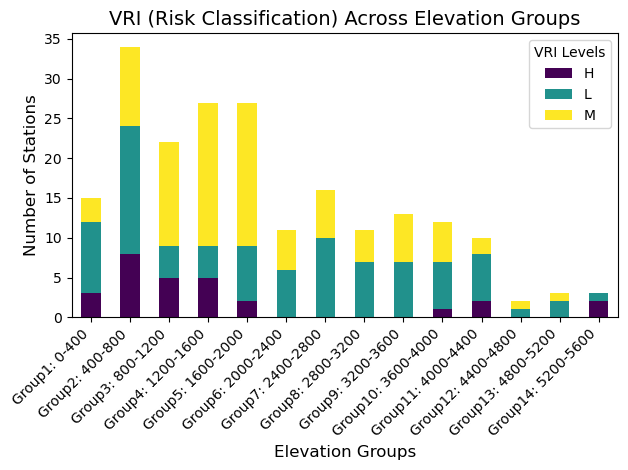

In [17]:
bins = range(0, 5800, 400)  
labels = [f'Group{i+1}: {bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]  # Create group labels

# Assign the binned elevation groups
merged_df['elevation_group'] = pd.cut(merged_df['elevation'], bins=bins, labels=labels)


elevation_vri_grouped = merged_df.groupby('elevation_group')['vri'].value_counts().unstack().fillna(0)
elevation_vri_grouped.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('VRI (Risk Classification) Across Elevation Groups', fontsize=14)
plt.xlabel('Elevation Groups', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.legend(title='VRI Levels', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
vri_weights = {'H': 3, 'M': 2, 'L': 1}
merged_df['vri_weight'] = merged_df['vri'].map(vri_weights)

# Check for missing values and remove rows with NaN in latitude, longitude, or vri_weight
cleaned_df = merged_df.dropna(subset=['latitude', 'longitude', 'vri_weight'])

# Create a list of [latitude, longitude, weight] for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['vri_weight']] for index, row in cleaned_df.iterrows()]

# Create a folium map centered around the average coordinates of the data
m = folium.Map(location=[cleaned_df['latitude'].mean(), cleaned_df['longitude'].mean()], zoom_start=10)

# Add the heatmap layer
HeatMap(heat_data, min_opacity=0.2, radius=20, blur=15, max_zoom=1).add_to(m)

# Save the map to an HTML file and display it
m.save('geospatial_risk_heatmap.html')

# If running in Jupyter or similar environments, you can display the map directly
m

### 1.3 Table 3 - Windspeed 2023_08_02
#### 1.3.1 Basic Summary Stat

In [35]:
windspeed_2023_08_02_edit = windspeed_2023_08_02.reset_index().drop(columns=['index'])
windspeed_2023_08_02_edit['date'] = pd.to_datetime(windspeed_2023_08_02_edit['date'], format='%m/%d/%Y')
windspeed_2023_08_02_edit

,date,wind_speed,station,snapshot_date
0,2012-09-14,19.0,AMO,8/2/2023
1,2012-09-15,20.0,AMO,8/2/2023
2,2012-10-14,16.0,AMO,8/2/2023
3,2012-10-26,23.0,AMO,8/2/2023
4,2012-10-27,15.0,AMO,8/2/2023
...,...,...,...,...
38659,2022-11-24,36.0,YSA,8/2/2023
38660,2022-11-25,36.0,YSA,8/2/2023
38661,2022-12-21,18.0,YSA,8/2/2023
38662,2022-12-24,31.0,YSA,8/2/2023


In [36]:
station_summary = windspeed_2023_08_02_edit.groupby('station')['wind_speed'].describe()
station_summary_edit = station_summary.reset_index()
station_summary_edit

,station,count,mean,std,min,25%,50%,75%,max
0,AMO,166.0,19.096386,5.748495,9.0,15.0,18.0,22.0,40.0
1,ANE,179.0,19.044693,7.263748,7.0,14.0,18.0,23.5,43.0
2,ARH,179.0,25.396648,8.103557,9.0,20.0,25.0,31.0,46.0
3,AVO,179.0,19.687151,6.249710,10.0,15.0,18.0,23.0,45.0
4,AVY,116.0,33.853448,12.556138,9.0,24.0,32.0,42.0,62.0
...,...,...,...,...,...,...,...,...,...
211,WST,61.0,32.327869,8.026459,10.0,28.0,33.0,38.0,51.0
212,WSY,176.0,38.755682,10.830247,7.0,31.0,38.0,45.0,75.0
213,WWY,179.0,33.815642,8.178801,16.0,29.0,33.0,38.0,56.0
214,WYN,178.0,35.140449,6.674637,18.0,31.0,35.0,39.0,54.0


In [37]:
location_wind_speed_merge = pd.merge(station_location, station_summary, left_on='weatherstationcode', right_on='station', how='right')
location_wind_speed_merge_edit = location_wind_speed_merge.drop(columns=['weatherstationcode'])
location_wind_speed_merge_edit

,latitude,longitude,count,mean,std,min,25%,50%,75%,max
0,33.357121,-117.276505,166.0,19.096386,5.748495,9.0,15.0,18.0,22.0,40.0
1,32.827078,-116.773356,179.0,19.044693,7.263748,7.0,14.0,18.0,23.5,43.0
2,33.040094,-116.959291,179.0,25.396648,8.103557,9.0,20.0,25.0,31.0,46.0
3,33.392510,-117.254700,179.0,19.687151,6.249710,10.0,15.0,18.0,23.0,45.0
4,32.864675,-116.747970,116.0,33.853448,12.556138,9.0,24.0,32.0,42.0,62.0
...,...,...,...,...,...,...,...,...,...,...
213,32.644300,-116.318600,61.0,32.327869,8.026459,10.0,28.0,33.0,38.0,51.0
214,33.086780,-116.689740,176.0,38.755682,10.830247,7.0,31.0,38.0,45.0,75.0
215,33.105110,-116.652940,179.0,33.815642,8.178801,16.0,29.0,33.0,38.0,56.0
216,33.104617,-116.602467,178.0,35.140449,6.674637,18.0,31.0,35.0,39.0,54.0


<Axes: >

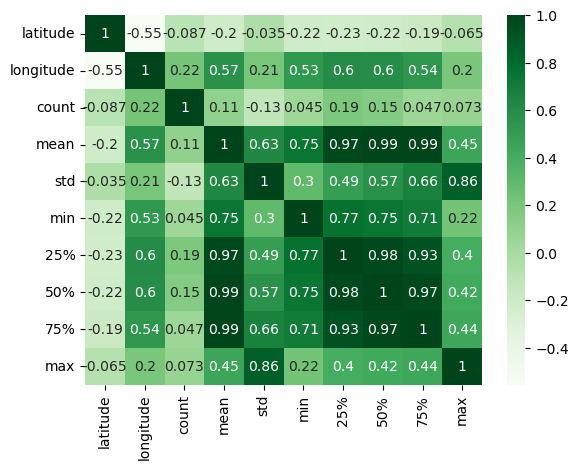

In [38]:
matrix = location_wind_speed_merge_edit.corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

> Seems that there is a correlation between the wind speed and the longitude. 

In [41]:
windspeed_2023_08_02_group = windspeed_2023_08_02.groupby('station')['wind_speed'].mean()
windspeed_2023_08_02_group

station
AMO    19.096386
ANE    19.044693
ARH    25.396648
AVO    19.687151
AVY    33.853448
         ...    
WST    32.327869
WSY    38.755682
WWY    33.815642
WYN    35.140449
YSA    30.888268
Name: wind_speed, Length: 216, dtype: float64

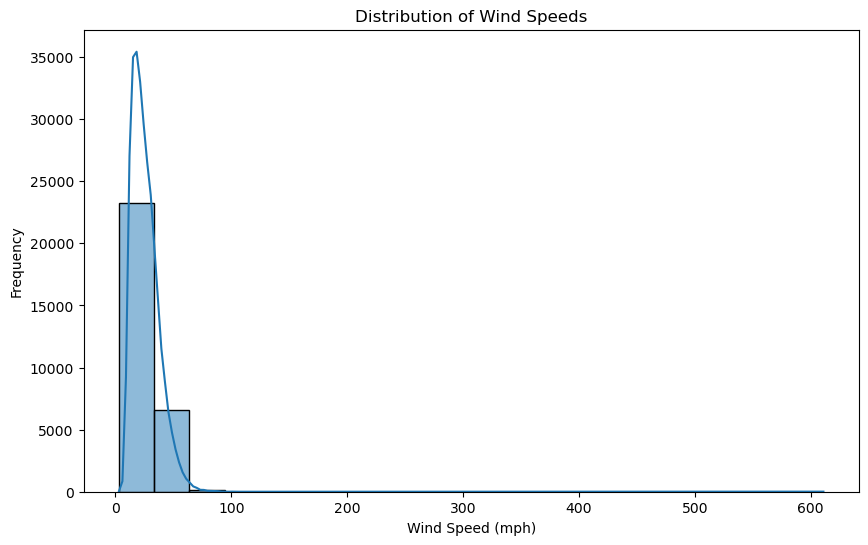

In [42]:
# Histogram for wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(windspeed_2023_08_02_edit['wind_speed'], bins=20, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

> We have an outlier of windspeed over 600mph.

In [44]:
windspeed_2023_08_02[windspeed_2023_08_02['wind_speed'] > 600]

,date,wind_speed,station,snapshot_date
2180,12/14/2013,611.0,BOC,8/2/2023


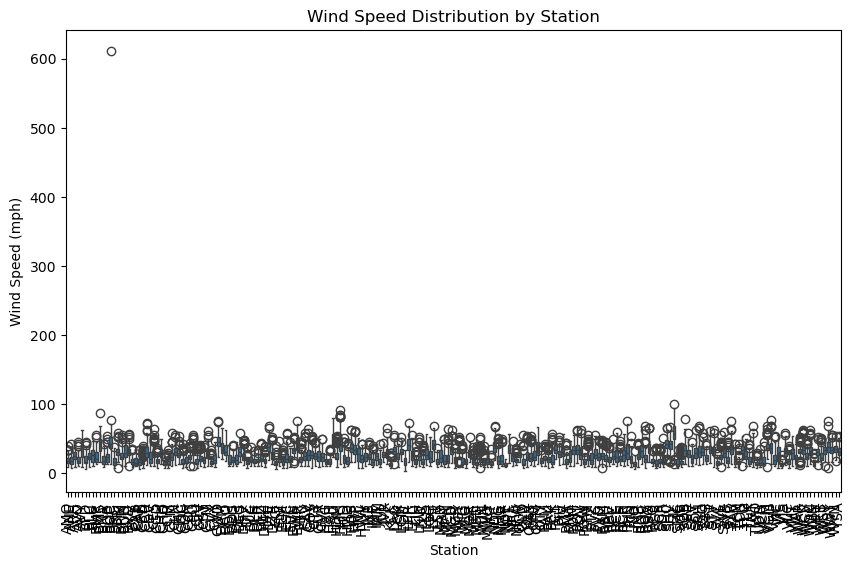

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed Distribution by Station')
plt.xticks(rotation=90)
plt.xlabel('Station')
plt.ylabel('Wind Speed (mph)')
plt.show()

### 1.3.2 Analysis of windspeed over time 

In [ ]:
windspeed_2023_08_02_edit['month'] = windspeed_2023_08_02_edit['date'].dt.month

month_summary = windspeed_2023_08_02_edit.groupby('month')['wind_speed'].describe()
month_summary

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,1596.0,30.066416,14.966189,7.0,18.00,27.0,40.0,89.0
4,556.0,30.111511,12.161458,12.0,21.75,27.0,35.0,101.0
5,956.0,31.411088,11.377918,11.0,23.00,29.0,38.0,87.0
9,2218.0,21.642922,7.751648,8.0,16.00,20.0,26.0,65.0
10,5762.0,25.158105,9.714881,8.0,18.00,23.0,31.0,78.0
11,10126.0,25.010073,10.705213,3.0,16.00,23.0,31.0,88.0
12,8726.0,26.531630,14.019785,6.0,16.00,25.0,35.0,611.0


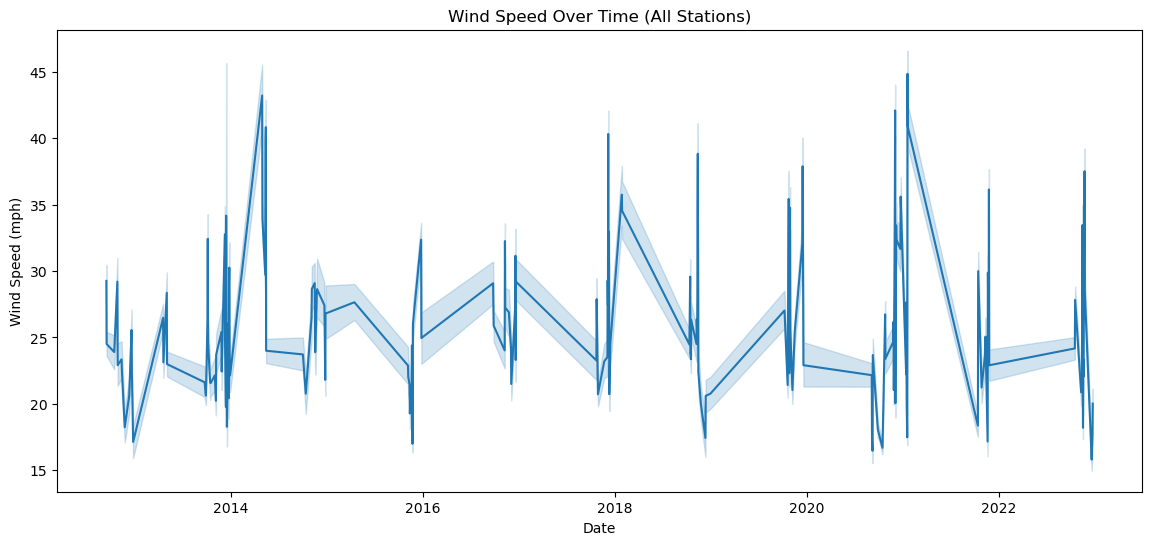

In [43]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed Over Time (All Stations)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

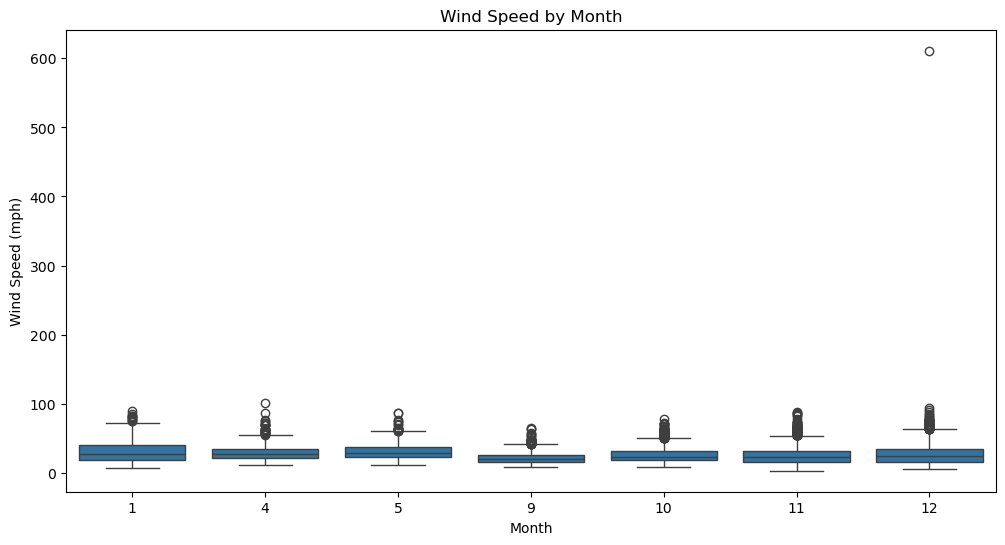

In [46]:
windspeed_2023_08_02_edit['date'] = pd.to_datetime(windspeed_2023_08_02_edit['date'])

# Extract month and year from the date
windspeed_2023_08_02_edit['month'] = windspeed_2023_08_02_edit['date'].dt.month
windspeed_2023_08_02_edit['year'] = windspeed_2023_08_02_edit['date'].dt.year

# Boxplot to show wind speed by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='wind_speed', data=windspeed_2023_08_02_edit)
plt.title('Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (mph)')
plt.show()

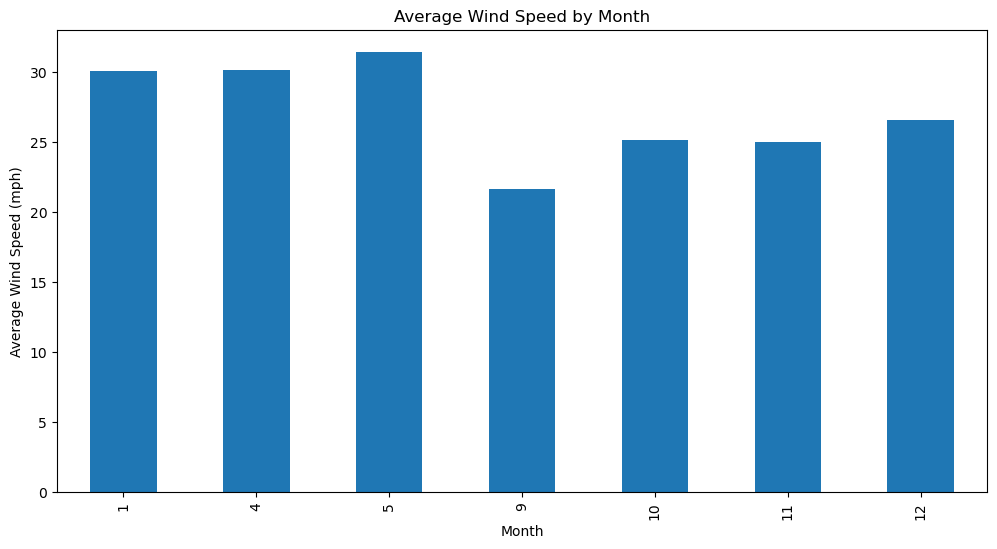

In [47]:
seasonal_corr = windspeed_2023_08_02_edit.groupby('month')['wind_speed'].mean()

# Plot the average wind speed for each month
plt.figure(figsize=(12, 6))
seasonal_corr.plot(kind='bar')
plt.title('Average Wind Speed by Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

## 2. Probability

Calculating PSPS Probability for each Weather Station 

In [ ]:
# not all stations have the same number of windspeed records
windspeed_grouped_count = windspeed_2023_08_02.groupby(by='station').count()
windspeed_grouped_count

,date,wind_speed,snapshot_date
station,,,
AMO,179,166,179
ANE,179,179,179
ARH,179,179,179
AVO,179,179,179
AVY,179,116,179
...,...,...,...
WST,179,61,179
WSY,179,176,179
WWY,179,179,179


In [62]:
station_codes = np.array(gis_2024_1004['weatherstationcode'])
merged_station_df = gis_2024_1004.merge(station_summary_2023_08_02, left_on='weatherstationcode', right_on='station', how='left')

In [63]:
merged_df[merged_df['weatherstationcode']=='AMO']['alert'].iloc[0]

35

In [68]:
prob_lst = []

for station in station_codes:
    station_windspeeds = np.array(windspeed_2023_08_02[windspeed_2023_08_02['station'] == station]['wind_speed'])
    # "alert" might be nan because of less entries in station_ss_df 
    has_threshold = True
    try: 
        threshold = merged_df[merged_df['weatherstationcode'] == station]['alert'].iloc[0]
    except:
        has_threshold = False
        prob = np.nan
    mean = station_windspeeds.mean()
    if has_threshold:
        prob = np.mean([1 if x >= threshold else 0 for x in station_windspeeds]) * 100
    count = np.count_nonzero(~np.isnan(station_windspeeds))
    prob_lst.append([station, threshold, count, mean, prob])

C:\Users\glori\AppData\Local\Temp\ipykernel_41340\1756093217.py:12: RuntimeWarning: Mean of empty slice.
  mean = station_windspeeds.mean()


In [69]:
prob_df = pd.DataFrame(prob_lst)
prob_df.columns = ['station', 'threshold', 'count', 'mean', 'probability (%)']
prob_df

,station,threshold,count,mean,probability (%)
0,CBD,35,171,NaN,1.117318
1,CCR,45,179,31.413408,13.966480
2,CES,41,173,NaN,7.262570
3,ROV,45,49,NaN,2.793296
4,CHO,35,117,NaN,0.000000
...,...,...,...,...,...
218,HAU,45,49,NaN,16.201117
219,BOB,45,45,NaN,2.234637
220,MWG,35,49,NaN,0.000000
221,CGD,35,179,18.407821,0.558659


In [70]:
print('max prob: ' + str(prob_df['probability (%)'].max()))
print('min prob: ' + str(prob_df['probability (%)'].min()))

max prob: 85.47486033519553
min prob: 0.0


In [ ]:
# station mismatches between table 1 and table 2
prob_df[prob_df['count'] == 0]

,station,threshold,count,mean,probability (%)
23,PSQC1,45,0,NaN,NaN
26,PZAC1,38,0,NaN,NaN
83,TNSC1,35,0,NaN,NaN
97,BAJC1,45,0,NaN,NaN
115,ALLC1,37,0,NaN,NaN
133,BVDC1,35,0,NaN,NaN


In [72]:
# sort probability high to low
prob_df.sort_values(by='probability (%)', ascending=False)[:-5]

,station,threshold,count,mean,probability (%)
12,SIL,45,177,NaN,85.474860
127,CWD,45,172,NaN,50.279330
153,STT,35,179,34.418994,46.368715
169,HHC,45,171,NaN,42.458101
174,BOC,45,179,46.357542,41.340782
...,...,...,...,...,...
99,DLR,35,49,NaN,0.000000
86,POW,35,117,NaN,0.000000
164,KCK,35,179,13.312849,0.000000
31,ELM,35,179,15.553073,0.000000


In [ ]:
# stations with less than 50 windspeed records
prob_df[prob_df['count'] <50].sort_values(by='count', ascending=True)#.shape

,station,threshold,count,mean,probability (%)
23,PSQC1,45,0,NaN,NaN
26,PZAC1,38,0,NaN,NaN
83,TNSC1,35,0,NaN,NaN
97,BAJC1,45,0,NaN,NaN
115,ALLC1,37,0,NaN,NaN
133,BVDC1,35,0,NaN,NaN
214,NOE,35,14,NaN,0.000000
149,CAB,35,24,NaN,0.000000
157,DAM,45,43,NaN,6.145251
141,RCC,38,45,NaN,2.793296


In [79]:
def dist_boxplot(station):
    plt.figure(figsize =(4, 4))
    subset = np.array(windspeed_2023_08_02[windspeed_2023_08_02['station'] == station]['wind_speed'])
    sns.boxplot(subset, width=0.2)
    threshold = prob_df[prob_df['station'] == station]['threshold'].iloc[0]
    plt.axhline(threshold)
    prob = prob_df[prob_df['station'] == station]['probability (%)'].iloc[0]
    plt.text(x=0, y=38, s=f'probability: ' + str(prob), color='red')
    plt.title(station)
    plt.show()

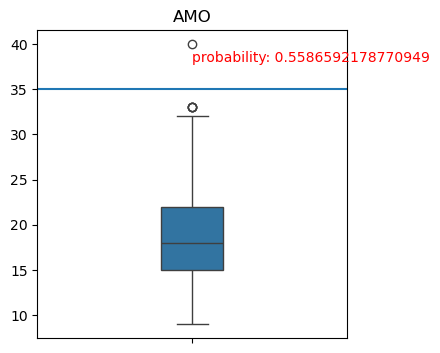

In [ ]:
# can run loop to show all stations distribtuion
# for station in station_codes:
#     dist_boxplot(station)

# only showing for one station for exampale
dist_boxplot('AMO')